# Forecasting with MCForecast

In this activity you will use the provided `MCForecastTools.py` module to forecast a portfolio's returns for one years worth of stock data from Home Depot and Disney.
  - You will retrieve data using the Quandl API.
  - You will then concatenate the dataframes for use with `MCSimulation`.
  - Then you will use `calc_cumulative_return` to get the cumulative return for the year.
  - After that you will plot the simulations, examine the distribution and review the summary statistics for the simulation.

>**Hint**: The most authoritative documentation you can find is the source code itself. You will need to read through the `MCForecastTools.py` file to get an idea of how the module is working.

## 1. Import Modules

In [1]:
# Import modules.
import pandas as pd
import numpy.random as rnd
from dotenv import load_dotenv
import requests
import os
import json
from MCForecastTools import MCSimulation


## 2. Load Environment Variables

In [2]:
# Load .env enviroment variables into the notebook
load_dotenv('../../../../.env')

# Get the API key from the environment variable and store it as a python variable
quandl_api_key = os.getenv('QUANDL_API_KEY_ENV')

## 3. Get Data from Quandl
  - Use the provided tickers and urls

In [3]:

# Ticker symbols
home_depot = "HD"
disney = "DIS"

In [4]:
# Urls for Quandl
url_hd = f"https://www.quandl.com/api/v3/datasets/WIKI/{home_depot}.json?&api_key={quandl_api_key}"

url_dis = f"https://www.quandl.com/api/v3/datasets/WIKI/{disney}.json?&api_key={quandl_api_key}"

In [5]:
# Home Depot response
hd_response = requests.get(url_hd).json()
hd_response

{'dataset': {'id': 9775732,
  'dataset_code': 'HD',
  'database_code': 'WIKI',
  'name': 'Home Depot Inc (HD) Prices, Dividends, Splits and Trading Volume',
  'description': "End of day open, high, low, close and volume, dividends and splits, and split/dividend adjusted open, high, low close and volume for Home Depot, Inc. (The) (HD). Ex-Dividend is non-zero on ex-dividend dates. Split Ratio is 1 on non-split dates. Adjusted prices are calculated per CRSP (www.crsp.com/products/documentation/crsp-calculations)\n\nThis data is in the public domain. You may copy, distribute, disseminate or include the data in other products for commercial and/or noncommercial purposes.\n\nThis data is part of Quandl's Wiki initiative to get financial data permanently into the public domain. Quandl relies on users like you to flag errors and provide data where data is wrong or missing. Get involved: connect@quandl.com\n",
  'refreshed_at': '2018-03-27T21:46:11.257Z',
  'newest_available_date': '2018-03-27

In [6]:
# Disney response
dis_response = requests.get(url_dis).json()
dis_response

{'dataset': {'id': 9775647,
  'dataset_code': 'DIS',
  'database_code': 'WIKI',
  'name': 'Disney (Walt) Co. (The) (DIS) Prices, Dividends, Splits and Trading Volume',
  'description': "End of day open, high, low, close and volume, dividends and splits, and split/dividend adjusted open, high, low close and volume for Walt Disney Company (The) (DIS). Ex-Dividend is non-zero on ex-dividend dates. Split Ratio is 1 on non-split dates. Adjusted prices are calculated per CRSP (www.crsp.com/products/documentation/crsp-calculations)\n\nThis data is in the public domain. You may copy, distribute, disseminate or include the data in other products for commercial and/or noncommercial purposes.\n\nThis data is part of Quandl's Wiki initiative to get financial data permanently into the public domain. Quandl relies on users like you to flag errors and provide data where data is wrong or missing. Get involved: connect@quandl.com\n",
  'refreshed_at': '2018-03-27T21:46:10.798Z',
  'newest_available_dat

## 4. Create a `pandas` `DataFrame`
- Using the response json objects, get a list of the column names and create dataframes for each ticker.
- Convert each dataframe's `Date` field to a `datetime` object and set `Date` as the index.
  - Use `to_datetime` to convert a string into a datetime object.
  - Use the `infer_datetime_format` parameter.
- Filter each dataframe to only keep the `"Open", "High", "Low", "Close", "Volume"` columns.
- The columns will then need to be renamed using all lowercase letters to work with `MCForecastTools`.
- Create a dictionary to hold the Home Depot and Disney dataframes similar to the following:
  ```
  { "ticker_name": ticker_df , .... }
  ```
  `MCForecastTools` requires that the dataframe be multi-indexed.
- Use the dictionary and `concat` from pandas to concentate the dataframes and return a multi-indexed dataframe.
- Use the dictionary's `.value()` method for the data parameter into `concat`.
- Set `axis = 1`.
- Use the dictionary's `.keys()` method for the `keys` parameter in `concat`.

In [7]:
# Get list of column names


In [8]:
# Create a dataframe from Home Depot the response.
hd_df = pd.DataFrame(columns=hd_response['dataset']['column_names'],data=hd_response['dataset']['data'])
hd_df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,177.38,178.73,173.600,174.68,4640376.0,0.0,1.0,177.380000,178.730000,173.600000,174.680000,4.640376e+06
1,2018-03-26,174.11,176.80,173.515,176.38,7123755.0,0.0,1.0,174.110000,176.800000,173.515000,176.380000,7.123755e+06
2,2018-03-23,176.24,177.56,171.560,171.80,5851950.0,0.0,1.0,176.240000,177.560000,171.560000,171.800000,5.851950e+06
3,2018-03-22,177.42,178.56,175.080,175.29,5049280.0,0.0,1.0,177.420000,178.560000,175.080000,175.290000,5.049280e+06
4,2018-03-21,178.35,180.14,177.680,178.02,3472629.0,0.0,1.0,178.350000,180.140000,177.680000,178.020000,3.472629e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,1981-09-28,10.25,10.25,10.250,10.25,16957.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.794525e+06
9203,1981-09-25,10.25,10.25,10.250,10.25,21382.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,7.306630e+06
9204,1981-09-24,10.25,10.25,10.250,10.25,14824.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.065639e+06
9205,1981-09-23,10.25,10.25,10.250,10.25,21597.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,7.380100e+06


In [9]:
# Convert `Date` to datetime
hd_df['Date'] = pd.to_datetime(hd_df['Date']).dt.date
hd_df

,Date,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
0,2018-03-27,177.38,178.73,173.600,174.68,4640376.0,0.0,1.0,177.380000,178.730000,173.600000,174.680000,4.640376e+06
1,2018-03-26,174.11,176.80,173.515,176.38,7123755.0,0.0,1.0,174.110000,176.800000,173.515000,176.380000,7.123755e+06
2,2018-03-23,176.24,177.56,171.560,171.80,5851950.0,0.0,1.0,176.240000,177.560000,171.560000,171.800000,5.851950e+06
3,2018-03-22,177.42,178.56,175.080,175.29,5049280.0,0.0,1.0,177.420000,178.560000,175.080000,175.290000,5.049280e+06
4,2018-03-21,178.35,180.14,177.680,178.02,3472629.0,0.0,1.0,178.350000,180.140000,177.680000,178.020000,3.472629e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9202,1981-09-28,10.25,10.25,10.250,10.25,16957.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.794525e+06
9203,1981-09-25,10.25,10.25,10.250,10.25,21382.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,7.306630e+06
9204,1981-09-24,10.25,10.25,10.250,10.25,14824.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.065639e+06
9205,1981-09-23,10.25,10.25,10.250,10.25,21597.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,7.380100e+06


In [27]:
# Set index
hd_df = hd_df.set_index('Date')
hd_df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,177.38,178.73,173.600,174.68,4640376.0,0.0,1.0,177.380000,178.730000,173.600000,174.680000,4.640376e+06
2018-03-26,174.11,176.80,173.515,176.38,7123755.0,0.0,1.0,174.110000,176.800000,173.515000,176.380000,7.123755e+06
2018-03-23,176.24,177.56,171.560,171.80,5851950.0,0.0,1.0,176.240000,177.560000,171.560000,171.800000,5.851950e+06
2018-03-22,177.42,178.56,175.080,175.29,5049280.0,0.0,1.0,177.420000,178.560000,175.080000,175.290000,5.049280e+06
2018-03-21,178.35,180.14,177.680,178.02,3472629.0,0.0,1.0,178.350000,180.140000,177.680000,178.020000,3.472629e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1981-09-28,10.25,10.25,10.250,10.25,16957.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.794525e+06
1981-09-25,10.25,10.25,10.250,10.25,21382.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,7.306630e+06
1981-09-24,10.25,10.25,10.250,10.25,14824.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.065639e+06


In [28]:
# Print Home Depot dataframe
hd_df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,177.38,178.73,173.600,174.68,4640376.0,0.0,1.0,177.380000,178.730000,173.600000,174.680000,4.640376e+06
2018-03-26,174.11,176.80,173.515,176.38,7123755.0,0.0,1.0,174.110000,176.800000,173.515000,176.380000,7.123755e+06
2018-03-23,176.24,177.56,171.560,171.80,5851950.0,0.0,1.0,176.240000,177.560000,171.560000,171.800000,5.851950e+06
2018-03-22,177.42,178.56,175.080,175.29,5049280.0,0.0,1.0,177.420000,178.560000,175.080000,175.290000,5.049280e+06
2018-03-21,178.35,180.14,177.680,178.02,3472629.0,0.0,1.0,178.350000,180.140000,177.680000,178.020000,3.472629e+06
...,...,...,...,...,...,...,...,...,...,...,...,...
1981-09-28,10.25,10.25,10.250,10.25,16957.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.794525e+06
1981-09-25,10.25,10.25,10.250,10.25,21382.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,7.306630e+06
1981-09-24,10.25,10.25,10.250,10.25,14824.0,0.0,1.0,0.020514,0.020514,0.020514,0.020514,5.065639e+06


In [29]:
# Create a dataframe from the Disney response.
dis_df = pd.DataFrame(columns=dis_response['dataset']['column_names'],data=dis_response['dataset']['data'])

In [32]:
# Convert `Date` to datetime
dis_df['Date'] = pd.to_datetime(dis_df['Date']).dt.date


In [33]:
# Set index
dis_df = dis_df.set_index('Date')

In [34]:
# Print Disney dataframe
dis_df

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2018-03-27,100.88,101.18,98.8900,99.36,7131436.0,0.0,1.0,100.880000,101.180000,98.890000,99.360000,7131436.00
2018-03-26,99.86,100.78,99.0782,100.65,7262326.0,0.0,1.0,99.860000,100.780000,99.078200,100.650000,7262326.00
2018-03-23,100.85,101.11,98.4500,98.54,7380554.0,0.0,1.0,100.850000,101.110000,98.450000,98.540000,7380554.00
2018-03-22,101.29,101.64,100.4100,100.60,8648198.0,0.0,1.0,101.290000,101.640000,100.410000,100.600000,8648198.00
2018-03-21,101.50,102.94,101.4200,101.82,5917934.0,0.0,1.0,101.500000,102.940000,101.420000,101.820000,5917934.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1962-01-08,37.88,38.38,37.0000,37.75,3197.0,0.0,1.0,0.143648,0.145544,0.140311,0.143155,623031.36
1962-01-05,37.75,38.00,37.6300,37.88,2397.0,0.0,1.0,0.143155,0.144103,0.142700,0.143648,467127.36
1962-01-04,37.75,37.88,37.5000,37.75,2397.0,0.0,1.0,0.143155,0.143648,0.142207,0.143155,467127.36


In [39]:
# Take only the "Open", "High", "Low", "Close", "Volume" columns for each dataframe.
hd_df = hd_df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume']]
dis_df = dis_df.loc[:, ['Open', 'High', 'Low', 'Close', 'Volume']]

In [42]:
# MCSimulation is case sensitive to column names.
# Rename the columns to "open", "high", "low", "close", "volume"
columns = ['open', 'high', 'low', 'close', 'volume']
hd_df.columns = columns
dis_df.columns = columns

In [43]:
# Create a dictionary of the two dataframes
to_merge_dict = {'HD': hd_df, 'DIS': dis_df}

In [44]:
# Use concat to create a merged dataframe from the dictionary
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())


In [45]:
# YOUR CODE HERE!
merged_df

HD                                         DIS          \
              open    high      low   close     volume    open    high   
Date                                                                     
2018-03-27  177.38  178.73  173.600  174.68  4640376.0  100.88  101.18   
2018-03-26  174.11  176.80  173.515  176.38  7123755.0   99.86  100.78   
2018-03-23  176.24  177.56  171.560  171.80  5851950.0  100.85  101.11   
2018-03-22  177.42  178.56  175.080  175.29  5049280.0  101.29  101.64   
2018-03-21  178.35  180.14  177.680  178.02  3472629.0  101.50  102.94   
...            ...     ...      ...     ...        ...     ...     ...   
1962-01-08     NaN     NaN      NaN     NaN        NaN   37.88   38.38   
1962-01-05     NaN     NaN      NaN     NaN        NaN   37.75   38.00   
1962-01-04     NaN     NaN      NaN     NaN        NaN   37.75   37.88   
1962-01-03     NaN     NaN      NaN     NaN        NaN   37.25   37.88   
1962-01-02     NaN     NaN      NaN     NaN        NaN   37.25   38.50   

                                         
                 low   close     volume  
Date                                     
2018-03-27   98.8900   99.36  7131436.0  
2018-03-26   99.0782  100.65  7262326.0  
2018-03-23   98.4500   98.54  7380554.0  
2018-03-22  100.4100  100.60  8648198.0  
2018-03-21  101.4200  101.82  5917934.0  
...              ...     ...        ...  
1962-01-08   37.0000   37.75     3197.0  
1962-01-05   37.6300   37.88     2397.0  
1962-01-04   37.5000   37.75     2397.0  
1962-01-03   37.2500   37.75     1998.0  
1962-01-02   37.2500   37.25     2098.0  

[14155 rows x 10 columns]

## 5. Forecast with `MCSimulation`
- Create an instance of `MCSimulation` with the following parameter values:
  - `weights == [0.25,0.75]`
  - `num_simulations == 500`
  - `num_trading_days == 252`
- Call the `calc_cumulative_return` method to run the number of simulations.
- Call the `plot_simulation` method to plot the simulated returns.
- Call `plot_distribution` to plot a histogram of the underlying distribution.
- Call `summarize_cumulative_return` to display summary statistics for the simulated distribution.

In [49]:
# Create a simulation object
merged_df = merged_df.dropna()
merged_df

MC_portfolio = MCSimulation(
portfolio_data = merged_df,
weights = [0.25,0.75],
num_simulation = 500,
num_trading_days = 252
)

In [51]:
# Review the simulation input data
MC_portfolio.portfolio_data.head()

HD                                                      DIS  \
              open    high      low   close     volume daily_return    open   
Date                                                                          
2018-03-27  177.38  178.73  173.600  174.68  4640376.0          NaN  100.88   
2018-03-26  174.11  176.80  173.515  176.38  7123755.0     0.009732   99.86   
2018-03-23  176.24  177.56  171.560  171.80  5851950.0    -0.025967  100.85   
2018-03-22  177.42  178.56  175.080  175.29  5049280.0     0.020314  101.29   
2018-03-21  178.35  180.14  177.680  178.02  3472629.0     0.015574  101.50   

                                                              
              high       low   close     volume daily_return  
Date                                                          
2018-03-27  101.18   98.8900   99.36  7131436.0          NaN  
2018-03-26  100.78   99.0782  100.65  7262326.0     0.012983  
2018-03-23  101.11   98.4500   98.54  7380554.0    -0.020964  
2018-03-22  101.64  100.4100  100.60  8648198.0     0.020905  
2018-03-21  102.94  101.4200  101.82  5917934.0     0.012127

In [52]:
# Run the Monte Carlo simulation to forecast the cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.


C:\Users\dlpst\OneDrive\Documents\UC_Berkeley_Blockchain_Bootcamp\GitHub\00_Module_Activities\Module_5\Class_2_Activities\04-Stu_Intro_MonteCarlo\Unsolved\MCForecastTools.py:127: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Monte Carlo simulation number 340.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003407,0.999720,1.019865,1.037311,1.052304,0.974268,1.044172,0.974714,1.002591,0.982803,...,0.947806,0.948643,0.979764,0.953499,1.056388,0.987984,1.031480,1.036016,0.967630,0.974313
2,1.042014,1.013874,1.041760,0.993968,1.051507,0.925116,1.014122,1.016633,1.065880,0.986791,...,0.975061,1.014065,1.029999,0.991844,1.127091,0.996646,1.039305,1.050405,0.960236,0.983843
3,1.017407,0.992171,0.994960,0.991697,0.979479,0.915138,1.018463,0.957342,1.004386,1.001070,...,0.968066,0.978511,1.062949,0.959450,1.126755,1.039250,0.986322,1.073059,0.928781,0.932353
4,1.114090,0.990569,0.939262,1.009593,0.972140,0.863793,0.998320,0.950433,0.969602,1.032413,...,0.941736,1.034012,1.052277,0.987019,1.120837,1.065674,0.943778,1.146308,0.982746,0.971313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,1.468145,1.118770,0.752553,0.467534,1.238776,0.466279,0.851229,0.593736,0.500789,0.769390,...,1.741396,1.278075,1.515603,0.495022,1.074217,0.428561,0.677345,1.185786,0.924564,1.526077
249,1.497234,1.164687,0.746625,0.455777,1.201384,0.457388,0.823586,0.566539,0.514703,0.734089,...,1.837755,1.217172,1.602208,0.498154,1.023136,0.439845,0.611377,1.100211,0.875164,1.515192
250,1.497190,1.089752,0.767433,0.467492,1.183503,0.454672,0.822547,0.557459,0.520408,0.747594,...,1.864198,1.204134,1.554803,0.501087,1.011680,0.475281,0.634077,1.138863,0.896746,1.475331
251,1.570572,1.115799,0.751596,0.465228,1.140476,0.473348,0.816630,0.525153,0.496532,0.717476,...,1.751295,1.187236,1.733210,0.498270,1.070247,0.480868,0.624406,1.122722,0.922152,1.636282


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

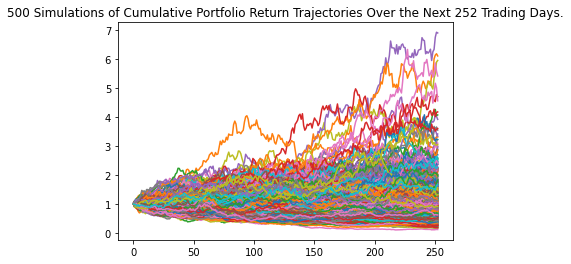

In [57]:
# Visualize the simulation by creating an
# overlay line plot
MC_portfolio.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

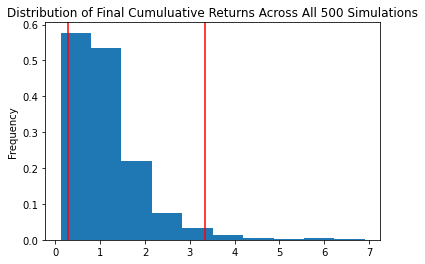

In [58]:
# Visualize the probability distribution of the simulation
# by plotting a histogram
MC_portfolio.plot_distribution()

In [60]:
# Generate summary statistics from the simulation results
# Save the results as a variable
MC_portfolio_summary_statistics = MC_portfolio.summarize_cumulative_return()

# Review the summary statistics
MC_portfolio_summary_statistics


count           500.000000
mean              1.159173
std               0.839902
min               0.116484
25%               0.624687
50%               0.958466
75%               1.461813
max               6.907234
95% CI Lower      0.274660
95% CI Upper      3.330124
Name: 252, dtype: float64